In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from scipy.stats import shapiro,normaltest
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pylab as py
import pickle


from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline


C:\Users\Sagar Mestry\Miniconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_data = pd.read_csv(r'C:\Users\Sagar Mestry\Downloads\Train_data.csv')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,01/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,09/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,8:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,09/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
def data_information(df):
    
    ## Creating Empty Data Frame
    data_info = pd.DataFrame(np.random.randn(0, 10) * 0,
                             columns=['No. of Observations (Nrow)',
                                      'No. of Variables (Ncol)',
                                      'No. of Numeric Variables',
                                      'No. of Categorical Variables',
                                      'No. of Logical Variables',
                                      'No. of Date Variables',
                                      'No. of Zero variance Variables (Uniform)',
                                      '% of Variables having <=50% missing cases',
                                      '% of Variables having >50% missing cases',
                                      '% of Variables having >90% missing cases'])

    ## Data Inofrmation
    data_info.loc[0, 'No. of Observations (Nrow)'] = df.shape[0]
    data_info.loc[0, 'No. of Variables (Ncol)'] = df.shape[1]
    data_info.loc[0, 'No. of Numeric Variables'] = df._get_numeric_data().shape[1]
    data_info.loc[0, 'No. of Logical Variables'] = df.select_dtypes(include='bool').shape[1]
    data_info.loc[0, 'No. of Categorical Variables'] = df.select_dtypes(include='object').shape[1]
    data_info.loc[0, 'No. of Date Variables'] = df.select_dtypes(include='datetime64').shape[1]
    data_info.loc[0, 'No. of Zero variance Variables (Uniform)'] = df.loc[:, df.apply(pd.Series.nunique) == 1].shape[1]

    null_per = pd.DataFrame(df.isnull().sum()/df.shape[0])
    null_per.columns = ['null_per']

    data_info.loc[0, '% of Variables having <=50% missing cases'] = null_per[null_per.null_per <= 0.50].shape[0] * 100 / \
                                                                    df.shape[1]
    data_info.loc[0, '% of Variables having >50% missing cases'] = null_per[null_per.null_per > 0.50].shape[0] * 100 / \
                                                                   df.shape[1]
    data_info.loc[0, '% of Variables having >90% missing cases'] = null_per[null_per.null_per > 0.90].shape[0] * 100 / \
                                                                   df.shape[1]

    ## Transposing Data to get in consumable format
    data_info = data_info.transpose()
    data_info.columns = ['Value']
    data_info['Value'] = data_info['Value'].astype(int)

    return data_info

In [7]:
data_information(train_data)

,Value
No. of Observations (Nrow),10683
No. of Variables (Ncol),11
No. of Numeric Variables,1
No. of Categorical Variables,10
No. of Logical Variables,0
No. of Date Variables,0
No. of Zero variance Variables (Uniform),0
% of Variables having <=50% missing cases,100
% of Variables having >50% missing cases,0
% of Variables having >90% missing cases,0


In [8]:
def cat_count_summary(df, id_cols):

    df_cat = df.drop(columns=id_cols).select_dtypes(['object', 'bool'])

    data_info_cat = pd.DataFrame()
    ## Counts Stats on Categorical Variable
    try:  ## incase Categorical variables not present
        for c in df_cat.columns:
            data_info_cat.loc[c, 'Unique Categories'] = len(df_cat[c].unique())
            data_info_cat.loc[c, 'Missing Percentage'] = (df_cat[df_cat[c].isnull()].shape[0]*100) / df_cat.shape[0]
    except:
        pass
    return data_info_cat

In [9]:
cat_count_summary(train_data, ['Price'])

,Unique Categories,Missing Percentage
Airline,12.0,0.000000
Date_of_Journey,40.0,0.000000
Source,5.0,0.000000
Destination,6.0,0.000000
Route,129.0,0.009361
Dep_Time,222.0,0.000000
Arrival_Time,1343.0,0.000000
Duration,368.0,0.000000
Total_Stops,6.0,0.009361
Additional_Info,10.0,0.000000


### Dealing with the NULL values

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

 As we can see there are very less NULL values present in the dataset so we can drop them.

In [11]:
train_data.dropna(inplace = True)

In [12]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
print("-" * 95)

-----------------------------------------------------------------------------------------------


 Date_of_Journey column's dtype is object which is of no use in EDA, so converting it into date time format & extracting day, month (by creating new columns) for further analysis. 

In [14]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day           #Extracting Day
train_data["Journey_month"] = pd.to_datetime(train_data.Date_of_Journey, format = "%d/%m/%Y").dt.month  #Extracting Month
train_data['weekday']= pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.weekday            #Extracting Weekday


In [15]:
train_data.drop(["Date_of_Journey"], axis = 1, inplace = True) #Now we can drop the original column

Similar to Date_of_Journey column, Dep_Time columns's dtype is object which is of no use in EDA, so converting it into date time format & extracting hour, minuts (by creating new columns) for further analysis.

Departure time is when flight leaves the airport & arrival time is when flight lands at the airport.

In [16]:
train_data["Dep_hour"] = pd.to_datetime(train_data.Dep_Time).dt.hour         # Extracting Hours from dep time
train_data["Dep_min"] = pd.to_datetime(train_data.Dep_Time).dt.minute        # Extracting Minutes from dep time


train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour    # Extracting Hours from arrival time
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute   # Extracting Minutes from arrival time


In [17]:
train_data.drop(["Dep_Time","Arrival_Time"], axis = 1, inplace = True) #Now we can drop the original column.

In [18]:
# Duration = Total time taken to reach Destination from Source. ie(Dep time - arrival time)


duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extracts hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[1]))   # Extracts only minutes from duration

In [19]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [20]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [21]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,weekday,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,6,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,6,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,16,50,21,35,4,45


Extracting whether its a morning,evening,night or afternoon flight from departure time & arrival time of the flight


In [22]:
def deparrtime(x):
   
    if(x >= 16 and x < 21):
        x='Evening'
    elif(x >= 21 or x < 5):
        x='Night'
    elif(x >= 5 and x < 11):
        x='Morning'
    elif(x >= 11 and x < 16):
        x='Afternoon'
    return x


In [23]:
train_data['Departure_time']=train_data['Dep_hour'].apply(deparrtime)
train_data['Arrival_time']=train_data['Arrival_hour'].apply(deparrtime)

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,weekday,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Departure_time,Arrival_time
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,6,22,20,1,10,2,50,Night,Night
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2,5,50,13,15,7,25,Morning,Afternoon
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,6,9,25,4,25,19,0,Morning,Night
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,6,18,5,23,30,5,25,Evening,Night
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,16,50,21,35,4,45,Evening,Night


## EDA

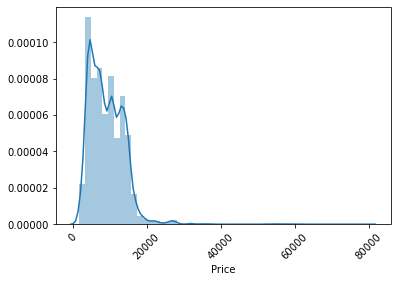

In [25]:
sns.distplot(train_data['Price'])
plt.xticks(rotation=45);

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_day      10682 non-null  int64 
 8   Journey_month    10682 non-null  int64 
 9   weekday          10682 non-null  int64 
 10  Dep_hour         10682 non-null  int64 
 11  Dep_min          10682 non-null  int64 
 12  Arrival_hour     10682 non-null  int64 
 13  Arrival_min      10682 non-null  int64 
 14  Duration_hours   10682 non-null  int64 
 15  Duration_mins    10682 non-null  int64 
 16  Departure_time   10682 non-null  object
 17  Arrival_time     10682 non-null

##### Destination vs price


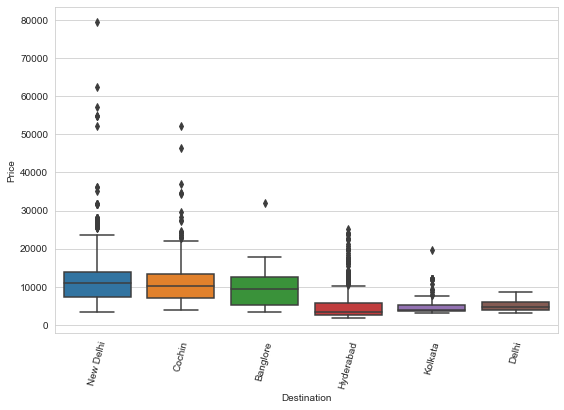

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize = (9,6))
sns.boxplot(y = "Price", x = "Destination", data = train_data.sort_values("Price", ascending = False))
plt.xticks(rotation = 75)
plt.show()

#### Source vs price


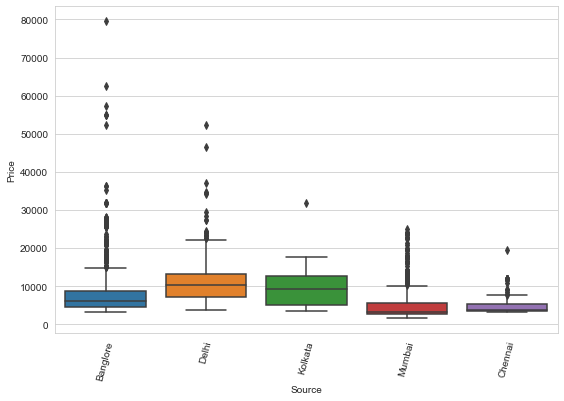

In [28]:
sns.set_style('whitegrid')
plt.figure(figsize = (9,6))
sns.boxplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False))
plt.xticks(rotation = 75)
plt.show()

From the above two plots we can observe that traveling to Delhi & traveling from Delhi is bit expensive compared to other cities.

Reason behind it might be as Delhi is one of the famous tourist places, capital of India.

#### Journey month vs price

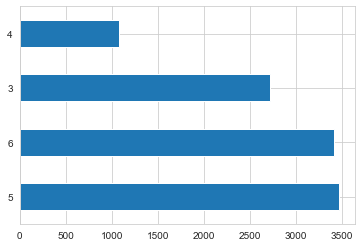

In [29]:
train_data['Journey_month'].value_counts().plot(kind = 'barh')

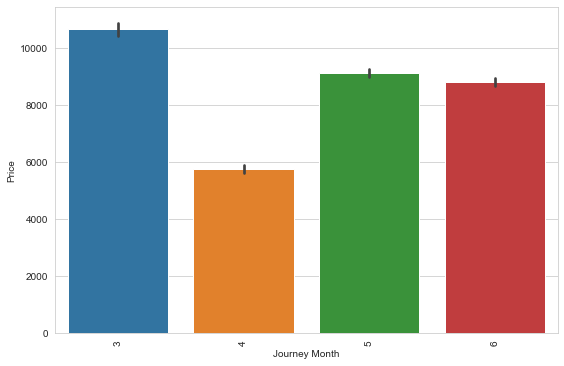

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize = (9,6))
fig =sns.barplot(x='Journey_month', y='Price', data=train_data)
fig.set_ylabel('Price')
fig.set_xlabel('Journey Month')
fig.set_xticklabels(fig.get_xticklabels(), rotation=90);

In [31]:
var = train_data.groupby('Journey_month').Price.mean().reset_index()
var

,Journey_month,Price
0,3,10673.205580
1,4,5770.847081
2,5,9127.722944
3,6,8828.796134


#### Week day vs price

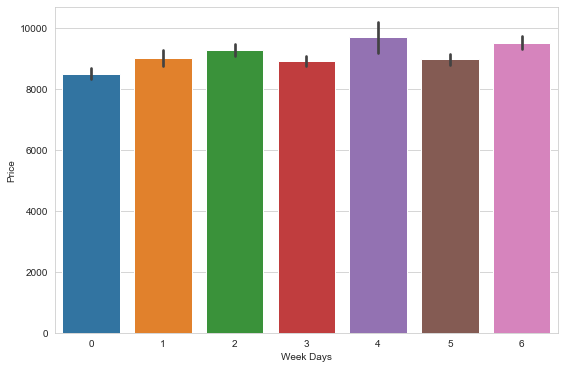

In [32]:
sns.set_style('whitegrid')
plt.figure(figsize = (9,6))
fig =sns.barplot(x = 'weekday',y = 'Price', data = train_data)
fig.set_ylabel('Price')
fig.set_xlabel('Week Days');

Ticket fare are higher on weekends specially on Friday & Sunday. That might be because on the weekdays people have school, colleges, office

##### Airline vs price


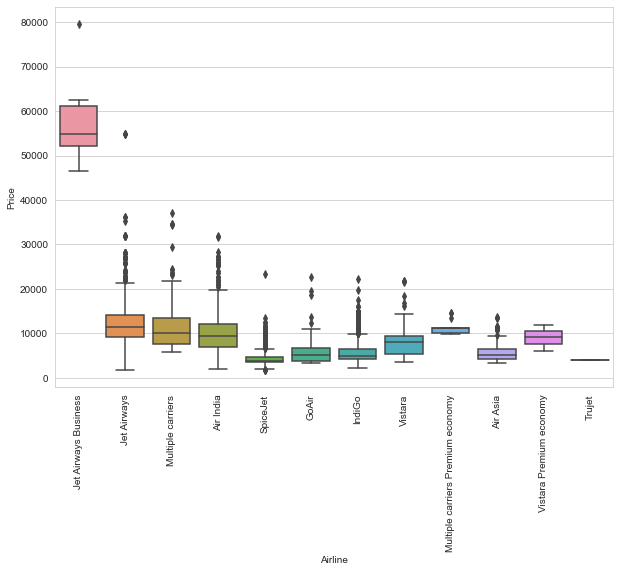

In [33]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,7))
sns.boxplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False))
plt.xticks(rotation = 90)
plt.show()

Jet Airways business class has highest range of price but if we see their total number of flights then those are very less.

Jet Airways & Air India's fare have higher range compared to the other airways.

In [34]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

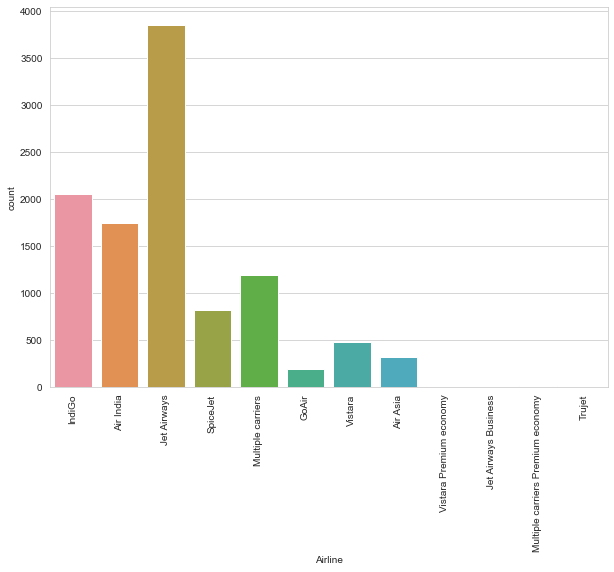

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,7))
sns.set_style('whitegrid')
fig = sns.countplot(x = 'Airline', data = train_data)
plt.xticks(rotation = 90)


#### Jet Airways has most number of flights compared to the ohter airlines.

Text(0.5, 0, 'Departure_time')

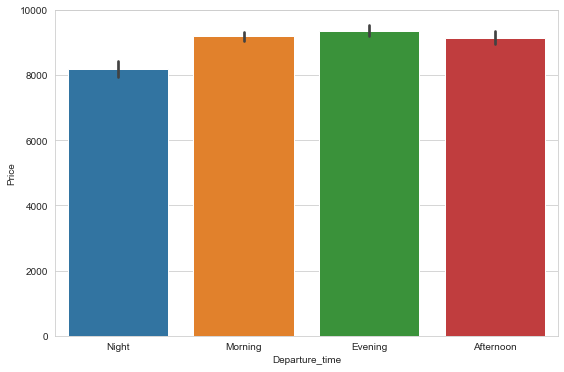

In [36]:
sns.set_style('whitegrid')
plt.figure(figsize = (9,6))
fig =sns.barplot(x = 'Departure_time',y = 'Price', data = train_data)
fig.set_ylabel('Price')
fig.set_xlabel('Departure_time')

Ticket prices are vary less at night time 21 pm - 5 am. This time involves early morning as well obviously people don't tend to travel at this time so that might be the reason for low price.

On the other hand prices in the evening are very high.

In [37]:
def normality_plots(df, col):
    fig = plt.figure(figsize=(15, 5))
    shapiro_p = round(shapiro(df[col])[1], 2)
    normaltest_p = round(normaltest(df[col])[1], 2)
    plt.subplot(1, 3, 1)
    plt.title('Histogram for '+col, color='navy', fontsize=12)
    plt.hist(df[col])
    plt.subplot(1, 3, 2)
    plt.title('Q-Q Plot for '+col, color='brown', fontsize=12)
    qqplot(df[col], line='s', ax=plt.subplot(1, 3, 2))
    plt.subplot(1, 3, 3)
    plt.title('Normality Test Results for '+col, color='olive', fontsize=12)
    plt.plot([shapiro_p, normaltest_p], linestyle=' ', marker='x')
    plt.text(x=0.2, y=0.5, s='Shapiro\np value\n'+str(shapiro_p))
    plt.text(x=0.6, y=0.5, s='Normaltest\np value\n'+str(normaltest_p))
    plt.ylim((0, 1))
    plt.hlines(y=0.05, color='r', xmin=0, xmax=1)
    plt.suptitle('Normality Test for '+col, fontsize=16, color='b')
    plt.show()

In [38]:
dd = train_data.select_dtypes(exclude=['object'])

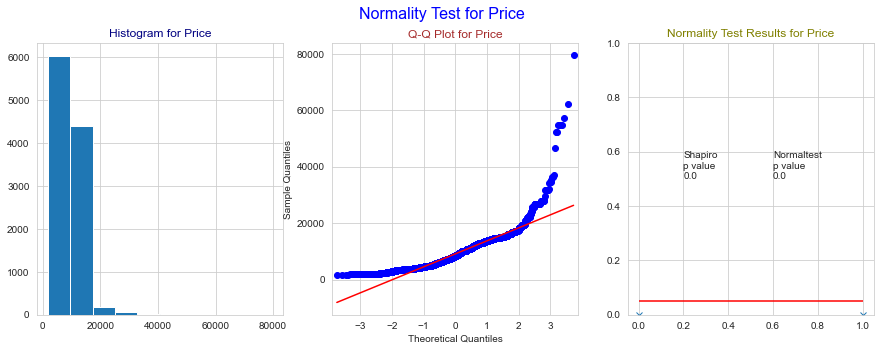

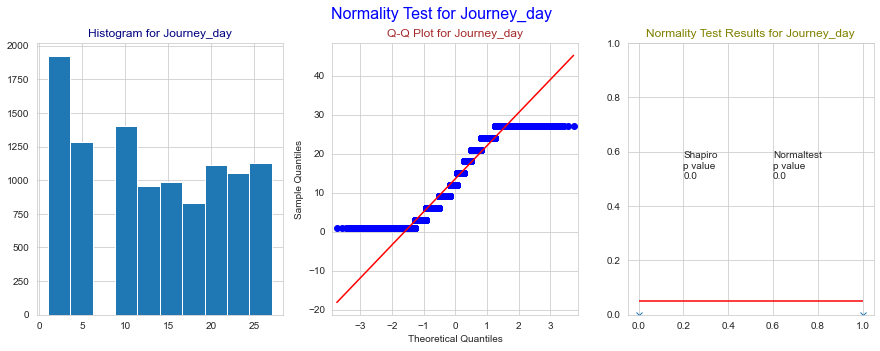

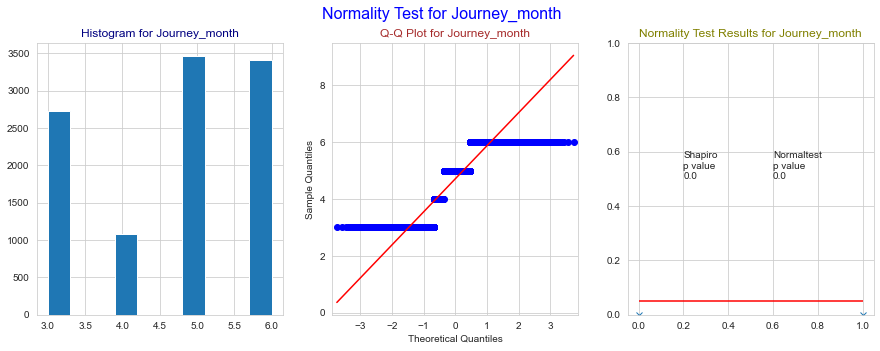

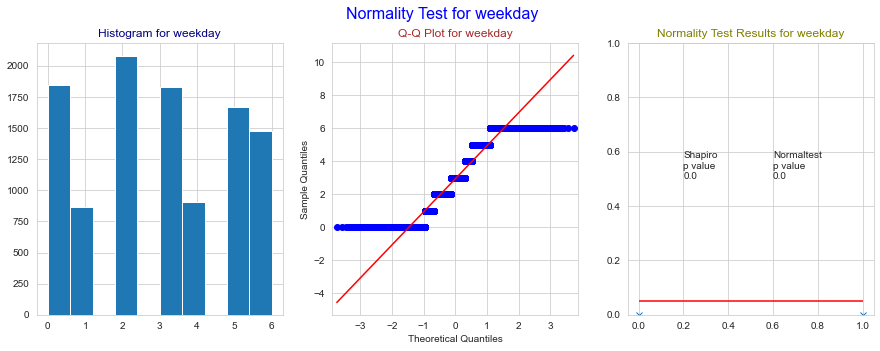

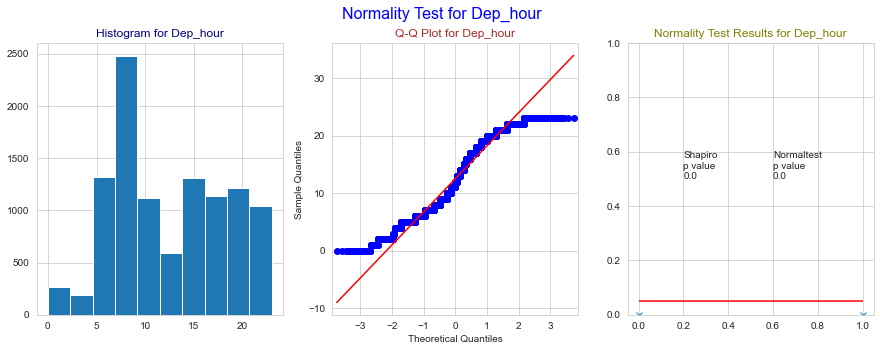

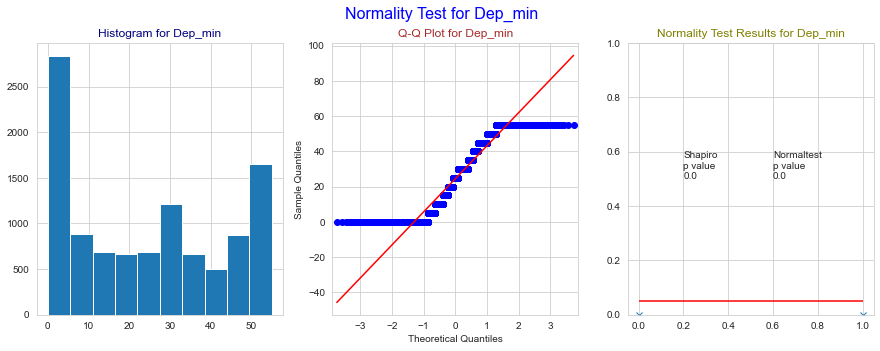

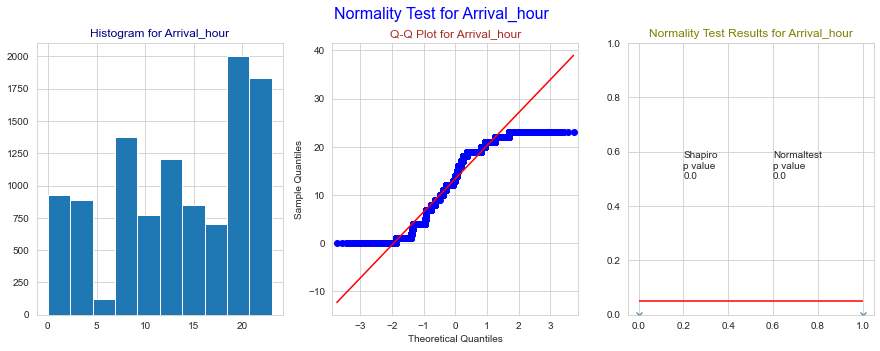

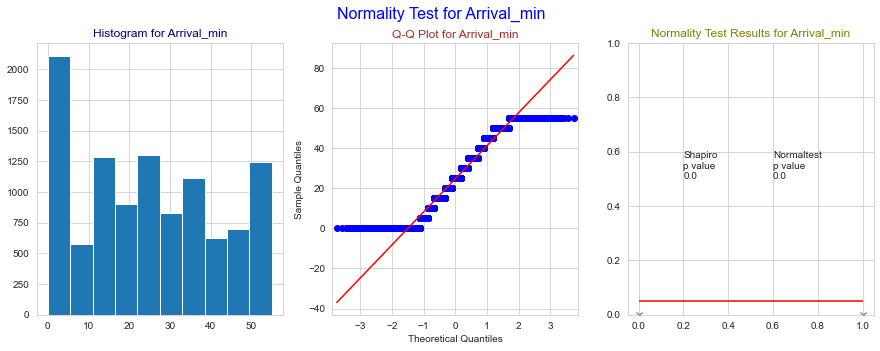

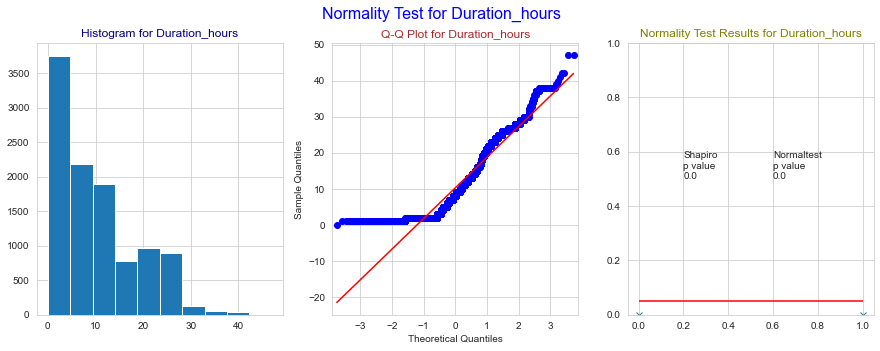

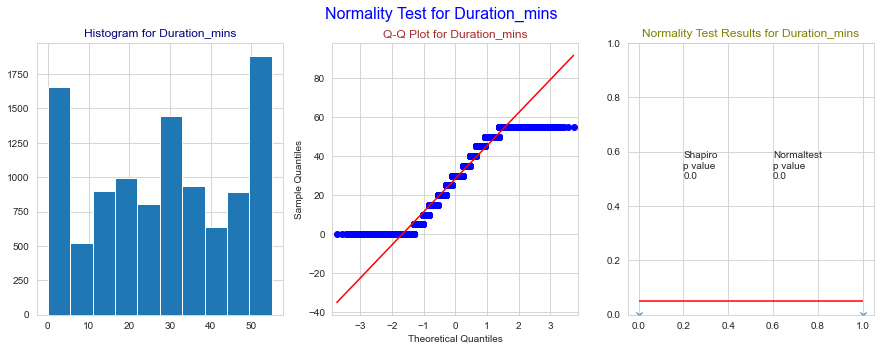

In [39]:
for d in dd.columns:
    normality_plots(dd, d)

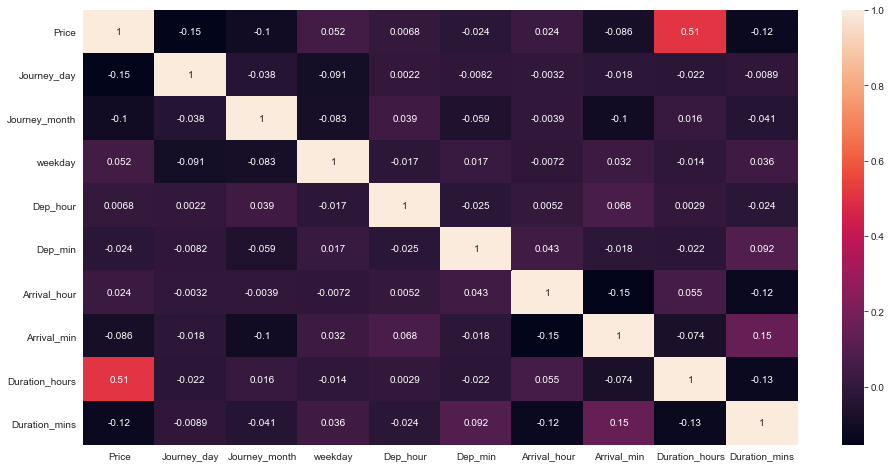

In [40]:
corrmat = train_data.corr()
fig,ax = plt.subplots(figsize = (16,8))
sns.heatmap(corrmat,annot = True,annot_kws={'size':10})

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = train_data.select_dtypes(exclude = object)
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

vif_data

,feature,VIF
0,Price,5.997805
1,Journey_day,3.251794
2,Journey_month,9.897480
3,weekday,3.002140
4,Dep_hour,5.369746
5,Dep_min,2.627283
6,Arrival_hour,4.427201
7,Arrival_min,3.157736
8,Duration_hours,3.374807
9,Duration_mins,3.719370


### As we can see VIF score for dep_hour is >5 then we can drop that column.

In [42]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [43]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [44]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [45]:
#Converting categorical variable (Nominal) into dummy variables

Source = train_data[['Source']]
Destination = train_data[['Destination']]
Dep = train_data[['Departure_time']]
Arrival = train_data[['Arrival_time']]


Airline = pd.get_dummies(train_data['Airline'], drop_first= True)
Source = pd.get_dummies(Source, drop_first= True)
Destination = pd.get_dummies(Destination, drop_first = True)
Dep = pd.get_dummies(Dep, drop_first = True)
Arrival = pd.get_dummies(Arrival, drop_first = True)

In [46]:
train_data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [47]:
# There is no such relevant information given in the Additional_Info column  
# Route and Total_Stops are related to each other & we can not use information given in the Route column directly so dropping that column.

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [48]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

Text(0.5, 0, 'Total_Stops')

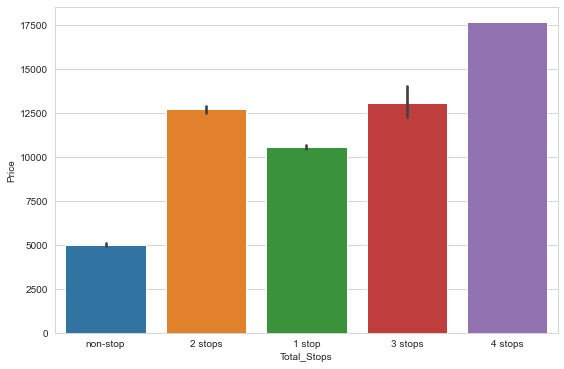

In [49]:
sns.set_style('whitegrid')
plt.figure(figsize = (9,6))
fig =sns.barplot(x = 'Total_Stops',y = 'Price', data = train_data)
fig.set_ylabel('Price')
fig.set_xlabel('Total_Stops')

As per the observation as the total stop increases tickets price also increse. So this particular column is not a nominal type.
Hence we have to deal with it with different approach. So assigning numbers as per the stops. 

In [50]:
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [51]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,weekday,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Departure_time,Arrival_time
0,IndiGo,Banglore,New Delhi,0,3897,24,3,6,22,20,1,10,2,50,Night,Night
1,Air India,Kolkata,Banglore,2,7662,1,5,2,5,50,13,15,7,25,Morning,Afternoon
2,Jet Airways,Delhi,Cochin,2,13882,9,6,6,9,25,4,25,19,0,Morning,Night
3,IndiGo,Kolkata,Banglore,1,6218,12,5,6,18,5,23,30,5,25,Evening,Night
4,IndiGo,Banglore,New Delhi,1,13302,1,3,4,16,50,21,35,4,45,Evening,Night


In [52]:
# Concatenate dataframe : [train_data + Airline + Source + Destination]

data_train = pd.concat([train_data, Airline, Source, Destination, Dep, Arrival], axis = 1)

In [53]:
#Droping dep_hour on the basis of VIF score
data_train.drop(["Airline", "Source", "Destination", "Departure_time", "Arrival_time", "Dep_hour"], axis = 1, inplace = True)

In [54]:
data_train.head(3)

,Total_Stops,Price,Journey_day,Journey_month,weekday,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Departure_time_Evening,Departure_time_Morning,Departure_time_Night,Arrival_time_Evening,Arrival_time_Morning,Arrival_time_Night
0,0,3897,24,3,6,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
1,2,7662,1,5,2,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,2,13882,9,6,6,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1


In [55]:
test_data = pd.read_csv(r'C:\Users\Sagar Mestry\Downloads\Test_data.csv')

In [56]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

## Feature Selection


In [57]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'weekday',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Departure_time_Evening',
       'Departure_time_Morning', 'Departure_time_Night',
       'Arrival_time_Evening', 'Arrival_time_Morning', 'Arrival_time_Night'],
      dtype='object')

In [58]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month','weekday',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours','Duration_mins',
        'Departure_time_Morning', 'Departure_time_Evening', 'Departure_time_Night',
        'Arrival_time_Morning', 'Arrival_time_Evening', 'Arrival_time_Night',
        'Air India', 'GoAir', 'IndiGo','Jet Airways', 'Jet Airways Business',
        'Multiple carriers','Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy','Source_Chennai', 
        'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()


,Total_Stops,Journey_day,Journey_month,weekday,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Departure_time_Morning,Departure_time_Evening,Departure_time_Night,Arrival_time_Morning,Arrival_time_Evening,Arrival_time_Night,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,6,20,1,10,2,50,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2,50,13,15,7,25,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,6,25,4,25,19,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,6,5,23,30,5,25,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,4,50,21,35,4,45,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
y = data_train.iloc[:, 1]

In [60]:
tree_reg = ExtraTreesRegressor()
tree_reg.fit(X, y)

ExtraTreesRegressor()

In [61]:
print(tree_reg.feature_importances_)

[2.24739193e-01 1.14696517e-01 5.04785557e-02 3.04406155e-02
 2.01450822e-02 2.20041106e-02 1.77843399e-02 1.17532006e-01
 1.58381554e-02 9.92859469e-03 6.72618296e-03 4.28507148e-03
 2.74443592e-03 8.00051902e-03 5.71228171e-03 9.10258803e-03
 1.68696260e-03 1.84749860e-02 1.43439540e-01 6.73378449e-02
 1.86771687e-02 8.71516281e-04 3.17962248e-03 1.31983106e-04
 5.11257121e-03 4.47432622e-05 8.18492598e-04 1.11426897e-02
 3.39949991e-03 6.78701526e-03 7.67166055e-03 1.94846304e-02
 6.17313677e-03 5.76197301e-04 2.48314890e-02]


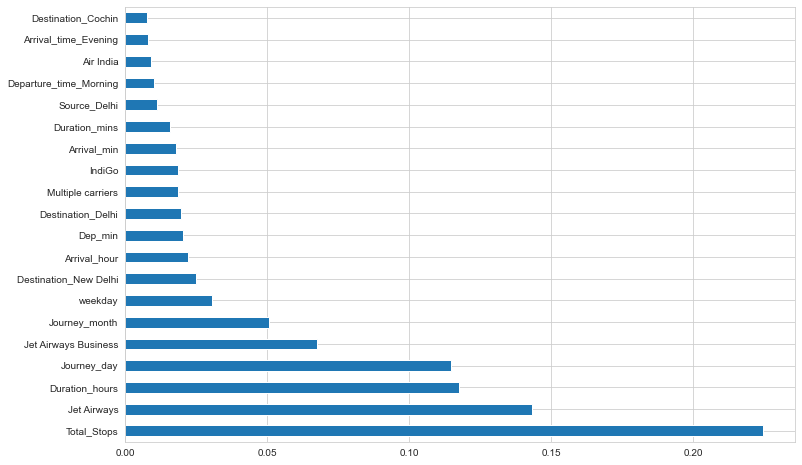

In [62]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(tree_reg.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### As we can see Journey day,  Jet airways, Duration hour, Total stops are the top 4 important features.

In [63]:
rfr=RandomForestRegressor()
lr=LinearRegression()
dt=DecisionTreeRegressor()
et=ExtraTreeRegressor()
gr=GradientBoostingRegressor()

In [64]:
exp_tup={0:(lr,'LinearRegression'),1:(rfr,'RandomForestRegressor'),2:(dt,'DecisionTreeRegressor'),3:(et,'ExtraTreeRegressor'),4:(gr,'GradientBoostingRegressor')}

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=7)

In [66]:
res_ls = []
for k in exp_tup.keys():
    model = exp_tup[k][0]
    name = exp_tup[k][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = metrics.r2_score(y_test, y_pred)

    res_ls.append((name,mae,mse,rmse,r2))
res_df = pd.DataFrame(res_ls)
res_df.columns = ['model','mae','mse','rmse','r2']
res_df.sort_values('r2',ascending=False,inplace=True)

In [67]:
res_df

,model,mae,mse,rmse,r2
1,RandomForestRegressor,1163.929577,3.464891e+06,1861.421777,0.827641
4,GradientBoostingRegressor,1483.861121,4.222715e+06,2054.924497,0.789943
3,ExtraTreeRegressor,1369.565315,5.712829e+06,2390.152493,0.715818
2,DecisionTreeRegressor,1349.768981,5.949187e+06,2439.095516,0.704060
0,LinearRegression,1920.295991,7.212596e+06,2685.627645,0.641213


#### R2 score before considering Dep & arrival time columns 0.825. After hyperparameter tuning .84

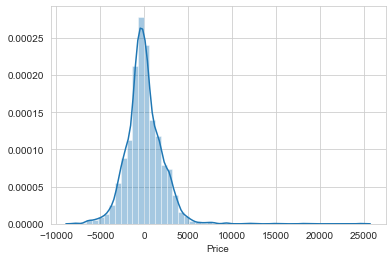

In [69]:
sns.distplot(y_test-y_pred)
plt.show()

### As per the results of various algorithm random forest tend to perform well so will try to optimez it's performace 

In [70]:
rfr=RandomForestRegressor()
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=7)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
#Using random searchCV to find out best parameters for performance optimization

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [72]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [73]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [74]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=754, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=754, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=754, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV]  n_estimators=754, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.0s
[CV] n_estimators=754, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=754, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.0s
[CV] n_estimators=754, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=754, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.3s
[CV] n_estimators=754, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=754, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=918, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=918, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  10.3s
[CV] n_estimators=918, min_samples_split=10, min_s

[CV]  n_estimators=590, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=590, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=590, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.6s
[CV] n_estimators=590, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=590, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.5s
[CV] n_estimators=590, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=590, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.3s
[CV] n_estimators=590, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=590, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.1s
[CV] n_estimators=590, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [75]:
prediction = rf_random.predict(X_test)

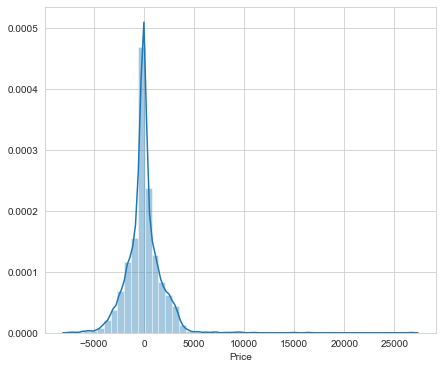

In [76]:
plt.figure(figsize = (7,6))
sns.distplot(y_test-prediction)
plt.show()

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('r2: ', metrics.r2_score(y_test, prediction))

MAE: 1130.1758835987398
MSE: 2989331.215344999
RMSE: 1728.9682516879825
r2:  0.8512970431929235
